In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('user_data.csv', sep=',')

In [3]:
logs = pd.read_csv('logs.csv', sep=',')

In [4]:
#Проверим размер таблиц, типы переменных, наличие пропущенных значений, описательную статистику.

In [5]:
user_data.shape # 2954 строки и 3 столбца

(2954, 3)

In [6]:
logs.shape  # 4500 строк и 4 столбца

(4500, 4)

In [7]:
user_data.dtypes # целые и булево

client     int64
premium     bool
age        int64
dtype: object

In [8]:
logs.dtypes #целые, булево и текст

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
user_data.isna().sum() #пропущенных значений нет

client     0
premium    0
age        0
dtype: int64

In [10]:
logs.isna().sum() #пропущенных значений нет

client      0
success     0
platform    0
time        0
dtype: int64

In [11]:
user_data.describe() 

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [13]:
logs['platform'].unique() # с каких платформ делаются заказы?

array(['phone', 'computer', 'tablet'], dtype=object)

In [14]:
#Какой клиент совершил больше всего успешных операций? (success == True)

In [15]:
logs_1=logs[logs['success']==True].groupby('client').agg({'success':'count'}).sort_values('success',ascending=False).head(20)
logs_1

,success
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [16]:
# С какой платформы было совершено наибольшее количество успешных операций?

In [17]:
logs_2=logs[logs['success']==True].groupby('platform').agg({'success':'count'}).sort_values('success',ascending=False).head(20)
logs_2

,success
platform,
phone,2019
computer,1090
tablet,180


In [18]:
# Какую платформу предпочитают премиальные клиенты?

In [19]:
merged=user_data.merge(logs, on='client', how='left')
merged

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [20]:
merged[merged['premium']==True].groupby('platform').agg({'platform':'count'})


,platform
platform,
computer,150
phone,246
tablet,24


In [21]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
#используя библиотеку seaborn с исходными параметрами.

In [22]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

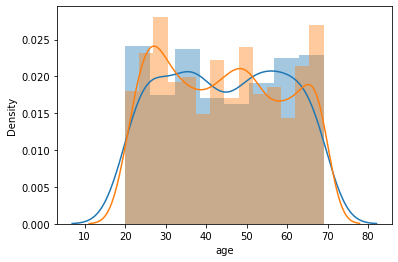

In [23]:
merged_prem=merged[merged['premium']==True] #Отобрали всех премиумных клиентов
merged_no_prem=merged[merged['premium']==False] #Отобрали всех непремиумных клиентов
sns.distplot(merged_prem['age'])
sns.distplot(merged_no_prem['age'])

In [24]:
#Постройте график распределения числа успешных операций: 
#x – число успешных операций,y – число клиентов, совершивших такое количество успешных операций

In [25]:
#Необходимо посчитать число успешных операций у каждого клиента
client_success = merged.groupby('client').agg({'success':'sum'}) 
client_success

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

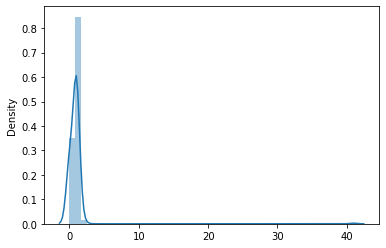

In [26]:
sns.distplot(client_success) #передаем весь датафрейм,т.к.он и есть 1 колонка

In [27]:
#Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
#По оси x – возраст, по оси y – число успешных операций. 

In [28]:
merged

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [31]:
df=merged[merged['platform']=='computer']
df=df.groupby('age').agg({'success':sum}).reset_index()
df.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot:xlabel='age', ylabel='success'>

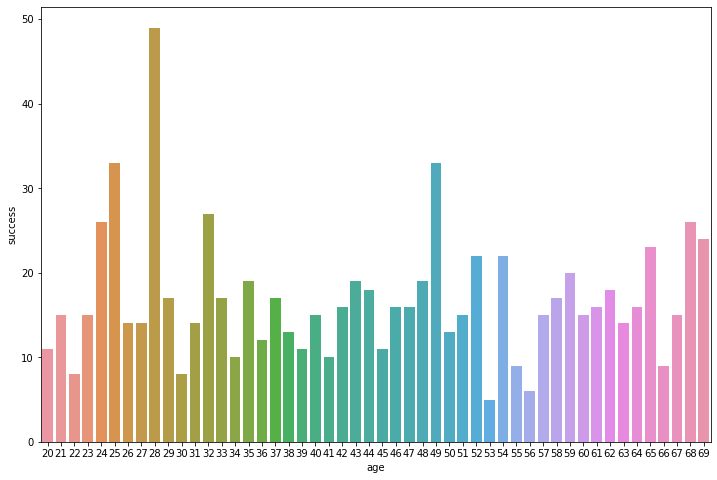

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8)) #для увеличения барплота (картинка 12 на8)
sns.barplot(x=df['age'],y=df['success'])

In [45]:
#Визуализация с помощью countplot: не нужно агрегировать, т.к.функция сделает это сама!
df_1=merged[merged['platform']=='computer'] #из заказов с компьютера выберем только успешные операции
df_1=df_1[df_1['success']==True]
df_1

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

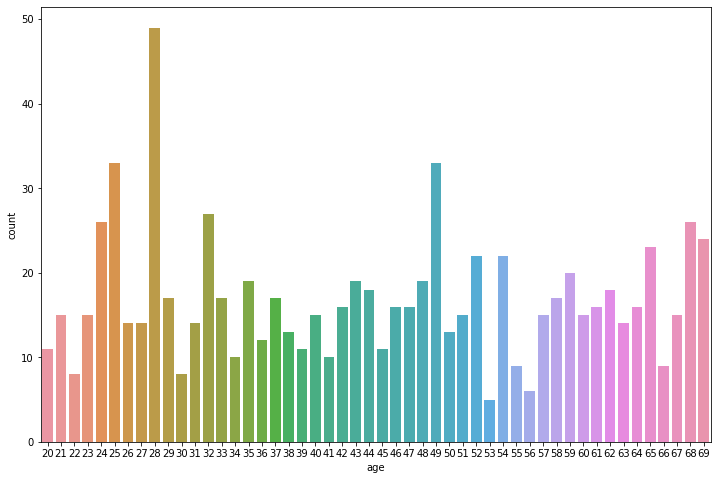

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(df_1['age'])
#df.value_counts().sort_values() 